## PROJECT OBJECTIVES 
1. Realise the Top Premium Brokers
2. Realise the VIP Customers
3. Worst Perfoming Brokers by Names

## Project Plan
1. Import Libraries
1. Connect to the Insurace Database
2. Query(Fetch) Data into dataframes
3. Make Visualizations of Perfomance repectively

In [1]:
#Import Libraries 
import pandas as pd
import pyodbc 
import seaborn as sns 
import matplotlib.pyplot as plt 


## 1. Connect to the Database

In [2]:
#Initialize the connection
database = 'PRACTICE'
server = 'DESKTOP-U507UFU\\MSSQLSERVER01'
#Initialize the Connetion
conn_str =(
    "Driver={SQL Server};"
    f"Server={server};"
    f"Database={database};"
    "Trusted_Connection={yes};"
)
#Establish the Connection

conn = pyodbc.connect(conn_str)

### 2. Query/Fetch data from DB

In [3]:
query = """
   WITH broker_id_cte AS (
SELECT b.BrokerID, b.BrokerName, COALESCE(p.Premium, 0) AS Premium, b.ReportsTo FROM brokers b
LEFT JOIN policies p
ON b.BrokerID = p.BrokerID
)
SELECT BrokerID, BrokerName, Premium, ReportsTo,
DENSE_RANK()OVER(ORDER BY Premium DESC) AS Ranked_broker
FROM broker_id_cte;
"""
df = pd.read_sql(query,conn)

C:\Users\User\AppData\Local\Temp\ipykernel_7388\2305251710.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BrokerID       201 non-null    int64  
 1   BrokerName     201 non-null    object 
 2   Premium        200 non-null    float64
 3   ReportsTo      195 non-null    float64
 4   Ranked_broker  201 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.0+ KB


In [11]:
df.head()

,BrokerID,BrokerName,Premium,ReportsTo,Ranked_broker
0,39,Broker_39,1995.0,28.0,1
1,4,Agent X,1990.0,3.0,2
2,28,Broker_28,1984.0,38.0,3
3,8,Broker_8,1975.0,29.0,4
4,13,Broker_13,1952.0,39.0,5


#### Obj1.  Realize top premium brokers

In [ ]:
# By Indivudual Policies

In [5]:
#Step1
#Strip White Spaces From Columns
df.columns = df.columns.str.strip()

In [6]:
#Top 10(Create a deep Copy)
Top10 = df.head(10).copy()

Top10.head(11)


,BrokerID,BrokerName,Premium,ReportsTo,Ranked_broker
0,39,Broker_39,1995.0,28.0,1
1,4,Agent X,1990.0,3.0,2
2,28,Broker_28,1984.0,38.0,3
3,8,Broker_8,1975.0,29.0,4
4,13,Broker_13,1952.0,39.0,5
5,22,Broker_22,1948.0,3.0,6
6,14,Broker_14,1943.0,19.0,7
7,11,Broker_11,1941.0,8.0,8
8,1,National,1934.0,NaN,9
9,24,Broker_24,1916.0,2.0,10


In [8]:
Top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BrokerID       10 non-null     int64  
 1   BrokerName     10 non-null     object 
 2   Premium        10 non-null     int64  
 3   ReportsTo      9 non-null      float64
 4   Ranked_broker  10 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


In [7]:
Top10['Premium'] = Top10['Premium'].astype(int)

#### Visualization PHASE 1: (BY Individual Policy)

C:\Users\User\AppData\Local\Temp\ipykernel_6324\3403991874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


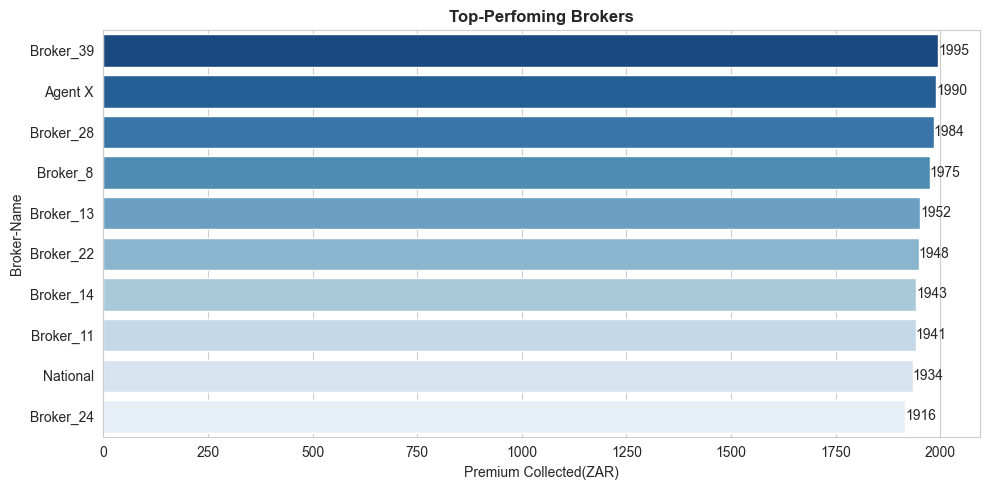

In [11]:
Top10 = Top10.sort_values('Premium', ascending=False) #Descending Order
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
colors = sns.color_palette("Blues", len(Top10))
sns.barplot(
    data = Top10,
    y = 'BrokerName', 
    x = 'Premium',
    palette = colors[::-1]
)
#Label Axes
plt.title("Top-Perfoming Brokers", fontweight = 'bold')
plt.xlabel("Premium Collected(ZAR)")
plt.ylabel("Broker-Name")

#Adding Data Labels
for index, value in enumerate(Top10['Premium']):
    plt.text(value, index, str(value), ha='left', va='center') # Places text at (x, y) coordinates

plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_6324\1400136575.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


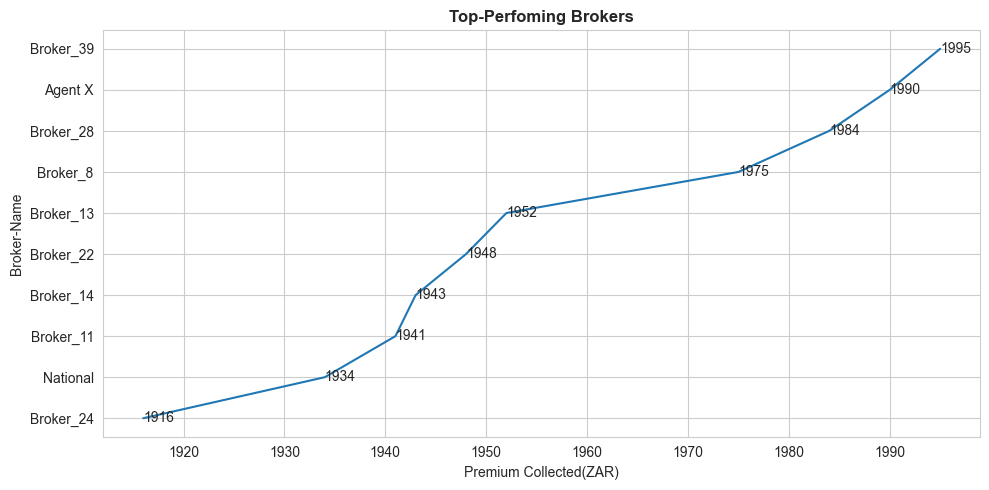

In [16]:
plt.figure(figsize = (10,5))
#Change BrockerID t
colors = sns.color_palette("Blues", len(Top10))
sns.lineplot(
    data = Top10,
    y = 'BrokerName', 
    x = 'Premium',
    palette = colors[::-1],
)
#Label Axes
plt.title("Top-Perfoming Brokers", fontweight = 'bold')
plt.xlabel("Premium Collected(ZAR)")
plt.ylabel("Broker-Name")
#Adding Data Labels
for index, value in enumerate(Top10['Premium']):
    plt.text(value, index, str(value), ha='left', va='center') # Places text at (x, y) coordinates

plt.tight_layout()

## 2. Worst Perfoming Brokers per Individual policy

In [29]:
Bottom10 = df.tail(10).copy()

In [30]:
Bottom10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 191 to 200
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BrokerID       10 non-null     int64  
 1   BrokerName     10 non-null     object 
 2   Premium        10 non-null     int64  
 3   ReportsTo      10 non-null     float64
 4   Ranked_broker  10 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


In [31]:
Bottom10.head(10)

,BrokerID,BrokerName,Premium,ReportsTo,Ranked_broker
191,7,Broker_7,153,39.0,180
192,15,Broker_15,137,23.0,181
193,11,Broker_11,135,8.0,182
194,32,Broker_32,126,12.0,183
195,16,Broker_16,119,11.0,184
196,32,Broker_32,117,12.0,185
197,6,Agent Z,116,3.0,186
198,26,Broker_26,108,44.0,187
199,14,Broker_14,101,19.0,188
200,46,Broker_46,0,7.0,189


In [32]:
Bottom10 = Bottom10.sort_values(by = 'Premium', ascending =True)

In [33]:
Bottom10.head(10)

,BrokerID,BrokerName,Premium,ReportsTo,Ranked_broker
200,46,Broker_46,0,7.0,189
199,14,Broker_14,101,19.0,188
198,26,Broker_26,108,44.0,187
197,6,Agent Z,116,3.0,186
196,32,Broker_32,117,12.0,185
195,16,Broker_16,119,11.0,184
194,32,Broker_32,126,12.0,183
193,11,Broker_11,135,8.0,182
192,15,Broker_15,137,23.0,181
191,7,Broker_7,153,39.0,180


C:\Users\User\AppData\Local\Temp\ipykernel_6324\2139047432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_6324\2139047432.py:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(


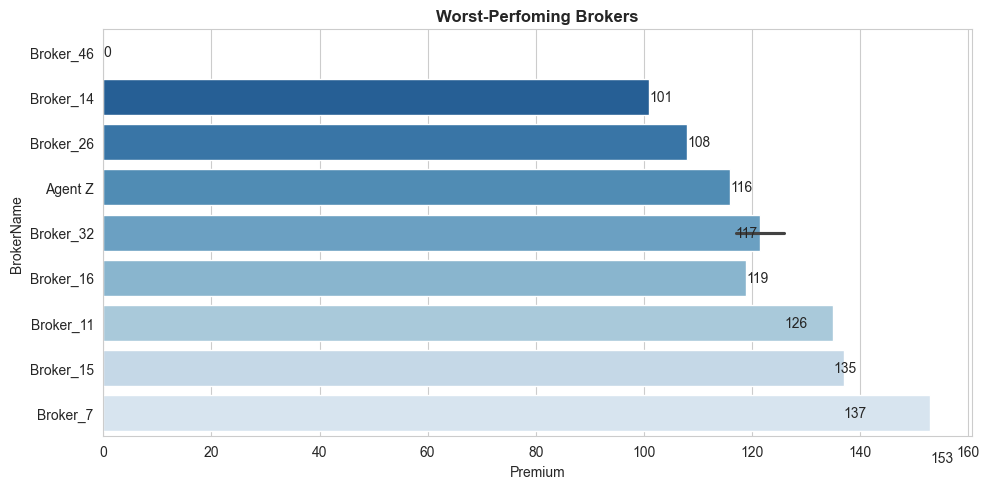

In [46]:
#Visualization
plt.figure(figsize = (10,5))
color = sns.color_palette('Blues', len(Bottom10))
sns.barplot(
    data = Bottom10,
    y='BrokerName',
    x='Premium',
    palette = colors[::-1],
)
#Labels
plt.title('Worst-Perfoming Brokers', fontweight='bold')
plt.xlabel('Premium')
plt.ylabel('BrokerName')

#Adding Data Labels
#Adding Data Labels
for index, value in enumerate(Bottom10['Premium']):
    plt.text(value, index, str(value), ha='left', va='center') # Places text at (x, y) coordinates
    
plt.tight_layout()





In [41]:
Bottom10.head(10)

,BrokerID,BrokerName,Premium,ReportsTo,Ranked_broker
200,46,Broker_46,0,7.0,189
199,14,Broker_14,101,19.0,188
198,26,Broker_26,108,44.0,187
197,6,Agent Z,116,3.0,186
196,32,Broker_32,117,12.0,185
195,16,Broker_16,119,11.0,184
194,32,Broker_32,126,12.0,183
193,11,Broker_11,135,8.0,182
192,15,Broker_15,137,23.0,181
191,7,Broker_7,153,39.0,180


### PHASE 2: BEST PERFOMANCE BY SUMMATION

### 1. Brokers

In [48]:
query = """
        ---Determine the Brokers who collect more money($) Per Month 
SELECT b.BrokerID, b.BrokerName, SUM(p.Premium) As Total_Premium , b.ReportsTo
--DENSE_RANK()OVER (PARTITION BY b.BrokerID ORDER BY SUM(p.Premium) DESC) AS ranked_broker
FROM brokers b 
LEFT JOIN policies p
ON b.BrokerID = p.BrokerID 
GROUP BY b.BrokerID, b.BrokerName, b.ReportsTo
ORDER BY Total_Premium DESC
;
"""
df1 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_6324\2720290289.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, conn)


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BrokerID       50 non-null     int64  
 1   BrokerName     50 non-null     object 
 2   Total_Premium  49 non-null     float64
 3   ReportsTo      49 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [50]:
df1.shape

(50, 4)

In [51]:
df1.head()

,BrokerID,BrokerName,Total_Premium,ReportsTo
0,24,Broker_24,10176.0,2.0
1,39,Broker_39,8355.0,28.0
2,35,Broker_35,8125.0,25.0
3,8,Broker_8,7503.0,29.0
4,2,Region A,7249.0,1.0


In [52]:
df1.columns =df1.columns.str.strip()

In [54]:
#Form a deep Copy of the DataFrame 
top10 = df1.head(10).copy()

In [65]:
top10.head(20)

,BrokerID,BrokerName,Total_Premium,ReportsTo
0,24,Broker_24,10176,2.0
1,39,Broker_39,8355,28.0
2,35,Broker_35,8125,25.0
3,8,Broker_8,7503,29.0
4,2,Region A,7249,1.0
5,42,Broker_42,7185,47.0
6,1,National,6938,NaN
7,44,Broker_44,6845,3.0
8,28,Broker_28,6557,38.0
9,15,Broker_15,6437,23.0


In [62]:
top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BrokerID       10 non-null     int64  
 1   BrokerName     10 non-null     object 
 2   Total_Premium  10 non-null     int64  
 3   ReportsTo      9 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 452.0+ bytes


In [61]:
#Changing datatype for Total Premium to int
top10['Total_Premium'] = top10['Total_Premium'].astype(int)
top10['BrokerName'] = top10['BrokerName'].astype(str)

In [64]:
top10 = top10.sort_values(by = 'Total_Premium', ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_6324\1581915421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


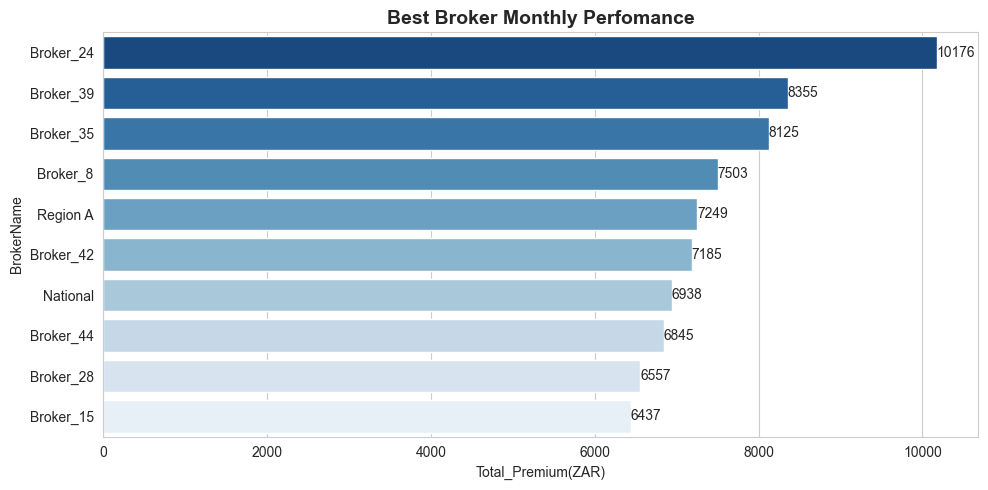

In [81]:
top10.columns = top10.columns.str.strip()
#Visualization
plt.figure(figsize = (10,5))
color = sns.color_palette('Blues', len(Bottom10))
sns.barplot(
    data = top10,
    x = 'Total_Premium',
    y = 'BrokerName',
    palette = colors[::-1]    
)
#Labels
plt.title("Best Broker Monthly Perfomance", fontweight = 'bold', fontsize=14)
plt.xlabel("Total_Premium(ZAR)")

#Adding Data Labels
for index, value in enumerate(top10['Total_Premium']):
    plt.text(value, index, str(value), ha='left', va='center') # Places text at (x, y) coordinates  
plt.tight_layout()
plt.savefig("Top_Brokers.png", dpi=300, bbox_inches= 'tight')
plt.show()



In [76]:
import os

In [78]:
print(os.getcwd())

D:\SQL  PRACTICE\Insurance_company2


### Worst Perfoming Brokers

In [ ]:
COALESCE(p.Premium, 0) AS Premium

In [14]:
query = """
        ---Determine the Brokers who collect least money($) Per Month 
SELECT b.BrokerID, b.BrokerName, COALESCE(SUM(p.Premium),0) As Total_Premium , b.ReportsTo
--DENSE_RANK()OVER (PARTITION BY b.BrokerID ORDER BY SUM(p.Premium) DESC) AS ranked_broker
FROM brokers b 
LEFT JOIN policies p
ON b.BrokerID = p.BrokerID 
GROUP BY b.BrokerID, b.BrokerName, b.ReportsTo
ORDER BY Total_Premium ASC
;
"""
df3 = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_18316\3805220843.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query, conn)


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BrokerID       50 non-null     int64  
 1   BrokerName     50 non-null     object 
 2   Total_Premium  50 non-null     int64  
 3   ReportsTo      49 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [18]:
df3.head(20)

,BrokerID,BrokerName,Total_Premium,ReportsTo
0,46,Broker_46,0,7.0
1,19,Broker_19,345,36.0
2,21,Broker_21,353,24.0
3,38,Broker_38,507,42.0
4,31,Broker_31,723,33.0
5,43,Broker_43,1604,44.0
6,50,Broker_50,1763,18.0
7,10,Broker_10,1887,43.0
8,5,Agent Y,2095,4.0
9,36,Broker_36,2390,49.0


In [17]:
#Form a Deep copy of the Original DataSet
df3 = df3.head(10).copy()

In [19]:
#Change Some Datatypes 
df3['Total_Premium'] = df3['Total_Premium'].astype(int)

In [20]:
#Strip White Spaces 
df3.columns = df3.columns.str.strip()

In [ ]:
#Adding Data Labels
for index, value in enumerate (df3['Total_Premium']):
    plt.text(index, str(value), ha='left', va='center')

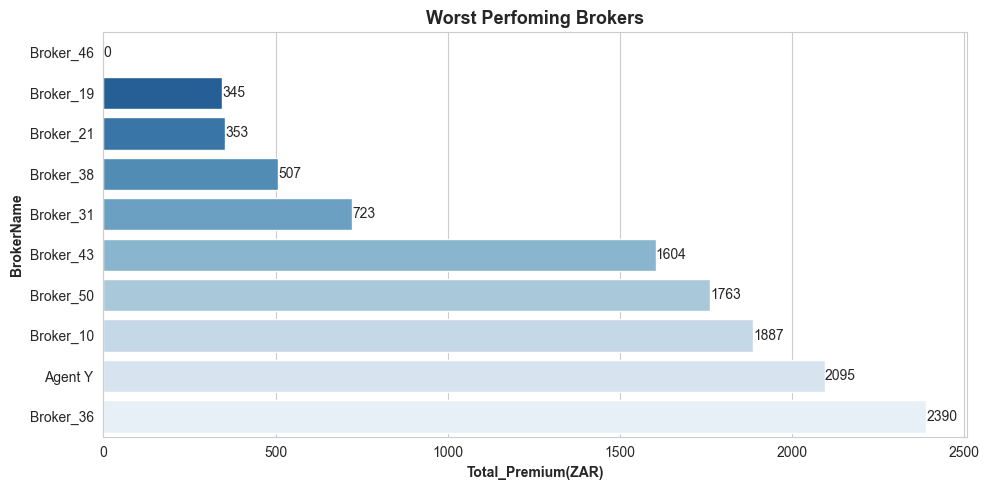

In [41]:
#Visualization
plt.figure(figsize=(10,5))
colors = sns.color_palette("Blues", len(df3))
sns.barplot(
    data = df3,
    x = 'Total_Premium',
    y = 'BrokerName',
    palette = colors[::-1],  
    hue = 'BrokerName'
)
plt.title("Worst Perfoming Brokers", fontweight = 'bold', fontsize=13)
plt.xlabel("Total_Premium(ZAR)", fontweight = 'bold')
plt.ylabel("BrokerName", fontweight = 'bold')

#Adding Data Labels
for index, value in enumerate(df3['Total_Premium']):
    plt.text(value, index, str(value), ha='left', va='center') 
    
plt.tight_layout()
plt.savefig("Worst-Broker Monthly-Perfomance.png", dpi= 300, bbox_inches = 'tight')
plt.show()


In [39]:
import os
print (os.getcwd())

D:\SQL  PRACTICE\Insurance_company2


### 2. Premium Customers

In [83]:
query = """
--Premium Customers
SELECT PolicyID, Premium FROM policies
ORDER BY premium DESC;

"""
df2= pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_6324\3930124132.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2= pd.read_sql(query, conn)


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PolicyID  200 non-null    int64
 1   Premium   200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [85]:
df2 = df2.head(10).copy()

In [89]:
df2['PolicyID'] = df2['PolicyID'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_6324\3096186278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


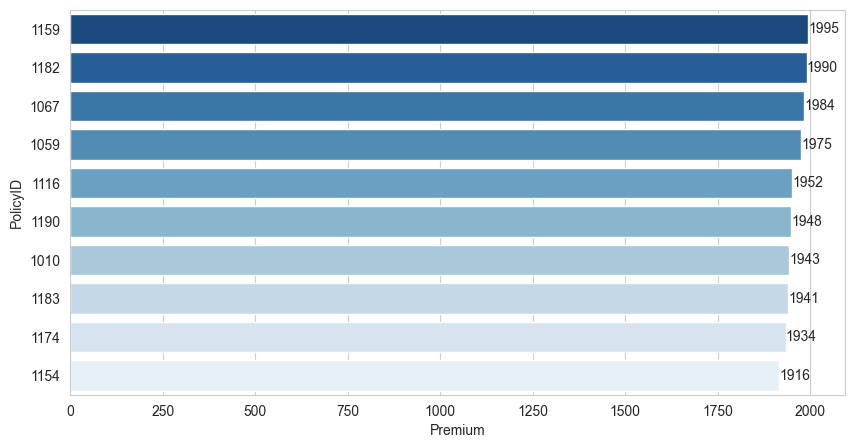

In [94]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('Blues', len(df2))
sns.barplot(
    data = df2,
    x = 'Premium',
    y = 'PolicyID',
    palette = colors[::-1]
)

#Adding Data Labels
for index, value in enumerate(df2['Premium']):
    plt.text(value, index, str(value), ha='left', va='center') # Places text at (x, y) coordinates  